In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 20
#from -5 to 5 uniformly distributed
x = np.random.random(N)*10 - 5

y = 0.5 * x-1 +np.random.randn(N)

#y=mx+c + noise

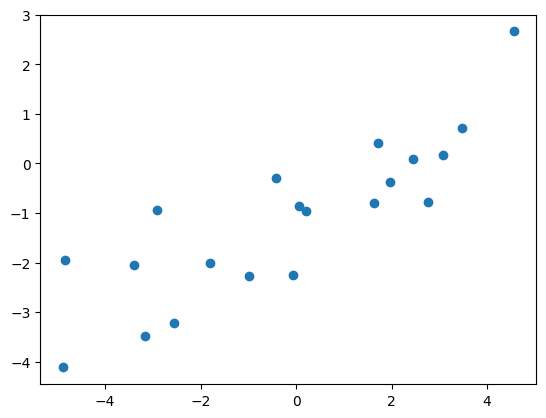

In [3]:
plt.scatter(x,y)

In [4]:
model = nn.Linear(1,1) #input,output sizes

In [6]:
print(x)
print(y)

[ 0.20291043 -3.39768561 -2.90863563  1.62715238  3.0825352   0.0672779
  3.47362495  2.76486069 -0.05754693 -0.41530257 -3.165787    1.72412122
 -2.56280579 -4.84383123 -4.88800335  4.55864605  2.4440223   1.97337902
 -1.79388857 -0.98337317]
[-0.96409019 -2.05164793 -0.94314158 -0.79002877  0.1646668  -0.8522994
  0.71914379 -0.78433811 -2.23982502 -0.28802843 -3.48691857  0.41113822
 -3.22588304 -1.95214586 -4.11471775  2.66317162  0.08710161 -0.37833463
 -2.00067527 -2.2606255 ]


In [7]:
#reshaping data to num_samples * num_features
x = x.reshape(N,1)
y = y.reshape(N,1)
print("x",x)
print('y',y)
# change from numpy float 64 to pytorch tensors float32
inputs = torch.from_numpy(x.astype(np.float32))
targets = torch.from_numpy(y.astype(np.float32))
print("inputs",inputs)
print("targets",targets)

x [[ 0.20291043]
 [-3.39768561]
 [-2.90863563]
 [ 1.62715238]
 [ 3.0825352 ]
 [ 0.0672779 ]
 [ 3.47362495]
 [ 2.76486069]
 [-0.05754693]
 [-0.41530257]
 [-3.165787  ]
 [ 1.72412122]
 [-2.56280579]
 [-4.84383123]
 [-4.88800335]
 [ 4.55864605]
 [ 2.4440223 ]
 [ 1.97337902]
 [-1.79388857]
 [-0.98337317]]
y [[-0.96409019]
 [-2.05164793]
 [-0.94314158]
 [-0.79002877]
 [ 0.1646668 ]
 [-0.8522994 ]
 [ 0.71914379]
 [-0.78433811]
 [-2.23982502]
 [-0.28802843]
 [-3.48691857]
 [ 0.41113822]
 [-3.22588304]
 [-1.95214586]
 [-4.11471775]
 [ 2.66317162]
 [ 0.08710161]
 [-0.37833463]
 [-2.00067527]
 [-2.2606255 ]]
inputs tensor([[ 0.2029],
        [-3.3977],
        [-2.9086],
        [ 1.6272],
        [ 3.0825],
        [ 0.0673],
        [ 3.4736],
        [ 2.7649],
        [-0.0575],
        [-0.4153],
        [-3.1658],
        [ 1.7241],
        [-2.5628],
        [-4.8438],
        [-4.8880],
        [ 4.5586],
        [ 2.4440],
        [ 1.9734],
        [-1.7939],
        [-0.9834]])
target

In [10]:
#loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)
epochs = 30
losses = []
for epoch in range(epochs):
  # Reset gradients of all model parameters to zero as PyTorch accumulates gradients
  optimizer.zero_grad()
  # gives outputs of forward pass as torch tensors
  outputs = model(inputs)
  # Calculate the loss between outputs and target values
  loss = criterion(outputs,targets)
  # appends loss to list
  losses.append(loss.item())
  # Compute gradients of loss with respect to model parameters
  loss.backward()
  # Update model parameters based on computed gradients
  optimizer.step()

  print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

Epoch 1/30, Loss: 0.7032
Epoch 2/30, Loss: 0.7032
Epoch 3/30, Loss: 0.7032
Epoch 4/30, Loss: 0.7032
Epoch 5/30, Loss: 0.7032
Epoch 6/30, Loss: 0.7032
Epoch 7/30, Loss: 0.7032
Epoch 8/30, Loss: 0.7032
Epoch 9/30, Loss: 0.7032
Epoch 10/30, Loss: 0.7032
Epoch 11/30, Loss: 0.7032
Epoch 12/30, Loss: 0.7032
Epoch 13/30, Loss: 0.7032
Epoch 14/30, Loss: 0.7032
Epoch 15/30, Loss: 0.7032
Epoch 16/30, Loss: 0.7032
Epoch 17/30, Loss: 0.7032
Epoch 18/30, Loss: 0.7032
Epoch 19/30, Loss: 0.7032
Epoch 20/30, Loss: 0.7032
Epoch 21/30, Loss: 0.7032
Epoch 22/30, Loss: 0.7032
Epoch 23/30, Loss: 0.7032
Epoch 24/30, Loss: 0.7032
Epoch 25/30, Loss: 0.7032
Epoch 26/30, Loss: 0.7032
Epoch 27/30, Loss: 0.7032
Epoch 28/30, Loss: 0.7032
Epoch 29/30, Loss: 0.7032
Epoch 30/30, Loss: 0.7032


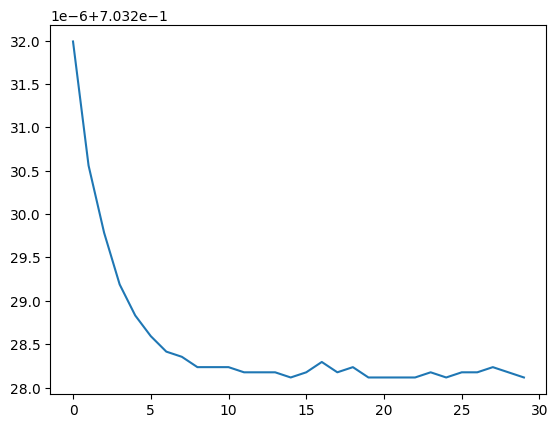

In [11]:
plt.plot(losses)

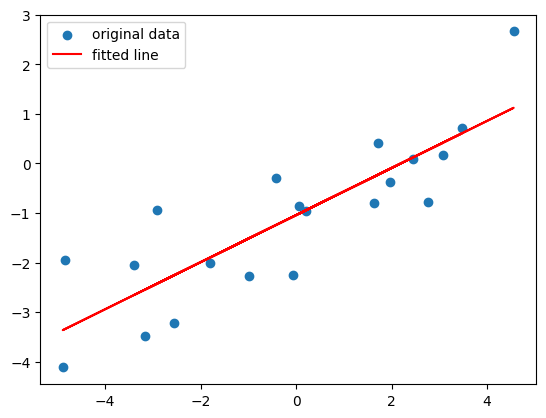

In [12]:
predicted = model(inputs).detach().numpy()
plt.scatter(x,y,label = 'original data')
plt.plot(x,predicted,label = 'fitted line',color ='red')
plt.legend()
plt.show()

In [13]:
with torch.no_grad():
  out = model(inputs).numpy()
out

array([[-0.9444833 ],
       [-2.6539655 ],
       [-2.4217753 ],
       [-0.2682852 ],
       [ 0.4226979 ],
       [-1.0088786 ],
       [ 0.6083785 ],
       [ 0.27187312],
       [-1.0681425 ],
       [-1.2379969 ],
       [-2.5438652 ],
       [-0.22224653],
       [-2.2575831 ],
       [-3.3405628 ],
       [-3.3615348 ],
       [ 1.1235223 ],
       [ 0.11954641],
       [-0.10390455],
       [-1.8925186 ],
       [-1.5077041 ]], dtype=float32)

In [14]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w,b)
# very close to true value (0.5, -1)

[[0.47477755]] [-1.0408206]
